# Slice Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@3baf5137

This op slices 3+ dimensional inputs and outputs up into sections, allowing for independent processing for each section before rejoining the sections at the end. Let's see how the `Op` is called:

In [2]:
ij.op().help('slice')

Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.slice.SliceRAI2RAI(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in,
		UnaryComputerOp op,
		int[] axisIndices,
		boolean dropSingleDimensions?)
	(ImgPlus out) =
	net.imagej.ops.transform.crop.CropImgPlus(
		ImgPlus in1,
		Interval in2,
		boolean dropSingleDimensions?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.transform.crop.CropRAI(
		RandomAccessibleInterval in1,
		Interval in2,
		boolean dropSingleDimensions?)

Let's take a quick look at the parameters:

* `RandomAccessibleInterval out`: the output
* `RandomAccessibleInterval in`: the input
* `UnaryComputerOp op`: an `Op` instance that describes how the slices are going to be processed.
* `int[] axidIndices`: the axes that define the plane, cube, or hypercube that we want our slices to look like. The axes not present in this list will be iterated through.
* `boolean dropSingleDimensions`: if true, discard all dimensions of size one present in the slices. This parameters is **not** required.

Let's see an example of where `slice()` can be useful:

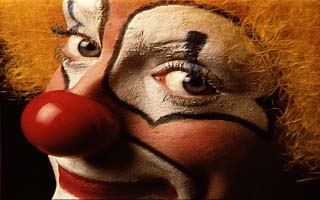

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")
ij.notebook().display(input)

Let's say that we want to do a Gaussian on this image:

[320, 200, 3]


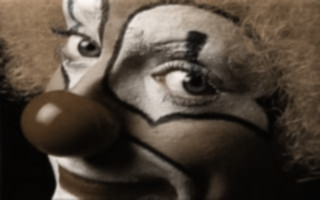

In [4]:
sigma = 1

output = ij.op().create().img(input) 
    
ij.op().run("gauss", output, input, sigma)

dims = new long[output.numDimensions()]
output.dimensions(dims)
println(dims)

ij.notebook().display(output)

As you can see, calling a plain old `gauss()` on this image washes out the channels, leaving a bit to be desired. If we use `slice()` to perform the `gauss()` we can keep the color intensity while still blurring the features. Note that `axes` contains the dimensions that we **want** to make slices of, **not** the dimensions that we want to iterate through. 

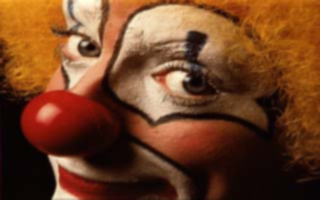

In [5]:
import net.imagej.ops.special.computer.Computers
import net.imagej.ops.Ops

gaussOp = Computers.unary(ij.op(), Ops.Filter.Gauss.class, output, input, sigma)

axes = [0, 1] as int[]

ij.op().run("slice", output, input, gaussOp, axes)

ij.notebook().display(output)

Ah, nice and colorful. If we wanted to instead call `gauss()` on the color channels, keeping the image details nice and sharp, we could replace `axes` with `[2]`:

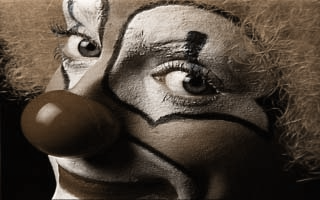

In [6]:
newAxes = [2] as int[]

ij.op().run("slice", output, input, gaussOp, newAxes)

ij.notebook().display(output)